# 1  loand data into Data Frame (loandf)  from the file loan.csv provided 

In [228]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

loandf = pd.read_csv("D:\\Upgrad_AI&ML\\Statistics Essential\\EDA\\Lending Club Case Study\\loan\\loan.csv",sep =',',encoding="ISO-8859-1",low_memory=False)
loandf

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,163,B,B2,NaN,10+ years,RENT,24000,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,28,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500,60 months,15.27%,60,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84,C,C5,NaN,10+ years,RENT,12252,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,9,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000,60 months,12.69%,68,B,B5,University Medical Group,1 year,RENT,80000,Source Verified,11-Dec,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,18,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
6,1069639,1304742,7000,7000,7000,60 months,15.96%,170,C,C5,Southern Star Photography,8 years,RENT,47004,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,24,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
7,1072053,1288686,3000,3000,3000,36 months,18.64%,109,E,E1,MKC Accounting,9 years,RENT,48000,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
8,1071795,1306957,5600,5600,5600,60 months,21.28%,152,F,F2,NaN,4 years,OWN,40000,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,6,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan
9,1071570,1306721,5375,5375,5350,60 months,12.69%,121,B,B5,Starbucks,< 1 year,RENT,15000,Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loa

# 2.Data Undertstanding

Read the data to Python dataframe, There are broadly three types of variables 
1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 
3. Customer behaviourvariables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).
#We have to understand column definations like loan_amount is the amount applied by potential borrowers, funded_amnt is the amount issued to the borrowers, and the funded_amnt_inv is the amount funded by investors from the second file data dictionery

In [229]:
#2. To print the full summary and check the datatype of various columns
loandf.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
id                                39717 non-null int64
member_id                         39717 non-null int64
loan_amnt                         39717 non-null int64
funded_amnt                       39717 non-null int64
funded_amnt_inv                   39717 non-null float64
term                              39717 non-null object
int_rate                          39717 non-null object
installment                       39717 non-null float64
grade                             39717 non-null object
sub_grade                         39717 non-null object
emp_title                         37258 non-null object
emp_length                        38642 non-null object
home_ownership                    39717 non-null object
annual_inc                        39717 non-null float64
verification_status               39717 non-null object
issue_d                           39717 non-null ob

#3 Correct the datatype of the column if required, Check columns where you may required to extract numerical data.

In [230]:
loandf['int_rate'].head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [231]:
#Convert "int_rate" datatype from "object" to "numeric"  and have to remove "%" before converting to numeric.
loandf['int_rate'] = loandf['int_rate'].apply(lambda i: pd.to_numeric(i.split("%")[0]))

In [232]:
loandf['int_rate'].head()

0   11
1   15
2   16
3   13
4   13
Name: int_rate, dtype: float64

In [233]:
loandf['emp_length'].head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [234]:
#Extract employee length from string in above format using regulor expression
import re
loandf = loandf[~loandf['emp_length'].isnull()]
#re populate employee length as numeric ,extract only number from string example 10+ years .. 
loandf['emp_length'] = loandf['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])
# convert object data type to int data type.
loandf['emp_length'] = loandf['emp_length'].apply(lambda x: pd.to_numeric(x))
loandf['emp_length'].head()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

# Data Cleaning

1. Check the percentage of missing values. 2. Remove all those with very high missing percentage. 3. For columns with less missing percentage: perform data cleaning steps for both columns and rows a. You don’t need to impute the data, you can just identify the correct metric to impute the column. b. You can drop rows where the missing percentage it quite high.

#1.percentage of missing values in each column

In [235]:
round(loandf.isnull().sum()/len(loandf.index),2)*100

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                          4
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                              32
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
i

Obervations:  
1.100% null values in 54 columns outof 111 columns (mths_since_last_major_derog,annual_inc_joint,dti_joint
,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,
total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op
,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq
,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts
,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,
percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit)

#3 drop the columns those having 100% missing values

In [236]:
# 3 get those column and drop 
missing_col_100 = loandf.columns[100*(loandf.isnull().sum()/len(loandf.index)) > 90]
print(missing_col_100)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [237]:
#4 .before droping shape of the loandf is 
print(loandf.shape)

(38642, 111)


In [238]:
# 5. after droping the 100% missing values columns
loandf = loandf.drop(missing_col_100, axis=1)
print(loandf.shape)

(38642, 55)


In [239]:
# 6. Now remainin columns
loandf.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [240]:
# 7. re run and see number of missing values again
100*(loandf.isnull().sum()/len(loandf.index))

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     4
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                         32
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq       65
open_acc                      0
pub_rec                       0
revol_ba

#.3Columns drop .. These columns also we are not using for our analyisis to find the defaulters 
#"mths_since_last_delinq (The number of months since the borrower's last delinquency.)-------64.66%
#" desc" : (Loan description provided by the borrower) ----32.5%

In [241]:
loandf['mths_since_last_delinq'].head()

0   nan
1   nan
2   nan
3    35
4    38
Name: mths_since_last_delinq, dtype: float64

In [242]:
loandf['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [243]:
# Going to drop  these two columns also.
loandf = loandf.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [244]:
# re run and see number of missing values again
100*(loandf.isnull().sum()/len(loandf.index))

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                    4
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
url                          0
purpose                      0
title                        0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
initial_

In [245]:
#11. missing values in rows
loandf.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
30       1
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       1
43       0
44       0
45       0
46       0
47       0
48       0
49       0
        ..
39667    3
39668    3
39669    3
39670    3
39671    4
39672    4
39673    3
39674    4
39675    3
39676    4
39677    3
39678    3
39679    3
39680    2
39681    3
39682    4
39683    3
39684    3
39685    4
39686    4
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5

In [246]:
#verify all columns 
loandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

Remove irrelevant columns:
Now let's look at each column from business perspective and  remove if any column which is not relavent for our analysis ..

In [247]:
#Remove columns where number of unique value is only 1
single_value_col = loandf.nunique()
print(single_value_col)
single_value_col = single_value_col[single_value_col.values == 1]
print(single_value_col)

id                            38642
member_id                     38642
loan_amnt                       880
funded_amnt                    1038
funded_amnt_inv                8097
term                              2
int_rate                        371
installment                   15149
grade                             7
sub_grade                        35
emp_title                     28775
emp_length                       10
home_ownership                    5
annual_inc                     5100
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           38642
purpose                          14
title                         19147
zip_code                        822
addr_state                       50
dti                            2863
delinq_2yrs                      11
earliest_cr_line                515
inq_last_6mths                    9
open_acc                    

In [248]:
loandf.drop(labels  = list(single_value_col.index), axis =1, inplace=True)

In [249]:
loandf.shape

(38642, 44)

In [250]:
columns_not_used = ["title","id","member_id","zip_code","addr_state","url"]

In [251]:
loandf.drop(labels = columns_not_used, axis =1, inplace=True)

In [252]:
loandf.shape

(38642, 38)

Analyze the caridinality of the column "purpose" and see distribution of below values which is less 5 % and also those category values those which we are not consideirng in our analysis
remove those rows from our analysis

In [253]:
(loandf.purpose.value_counts()*100)/len(loandf)

debt_consolidation   47
credit_card          13
other                10
home_improvement      7
major_purchase        5
small_business        5
car                   4
wedding               2
medical               2
moving                1
house                 1
vacation              1
educational           1
renewable_energy      0
Name: purpose, dtype: float64

In [254]:
cardinality_purpose = (loandf.purpose.value_counts()*100)/len(loandf)
cardinality_purpose = cardinality_purpose[(cardinality_purpose < 0.50) | (cardinality_purpose.index == 'other')] 
loandf.drop(labels = loandf[loandf.purpose.isin(cardinality_purpose.index)].index, inplace=True)

In [255]:
loandf.purpose.unique()

array(['credit_card', 'car', 'small_business', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'educational'],
      dtype=object)

#These are the categories  which are grater than 0.50 persentage of the row which we consider for our analysis
'credit_card', 'car', 'small_business', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'educational'
almost 4000 rows get removed 

In [256]:
loandf.shape

(34714, 38)

#Data Analysis

● The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. 
There are broadly three types of variables 
1. those which are related to the applicant (demographic variables such as age, occupation, employment details etc.), 
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and 
3. Customer behaviourvariables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).
● Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.
● The ones marked 'current' are neither fully paid not defaulted, so get rid of the current loans. Also, tag the other two values as 0 or 1 to make your analysis simple and clean.

In [257]:
loandf.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

Major variable : LoanStatus (target variable)
And Below are the input variables for loan predection 
1.purpose
2.emp_length
3.Grade
4.int_rate
5.term
6.ChargeOff
7.loan_amount
8.funded_amunt
9.funded_amout_inv
10.int_rate
11.installment
12.anual_inc
13.dti
14.loan_income_ratio
15.issue_d 
16.annual_inc
The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.
Now, there are broadly 3 types of variables -

In [258]:
# prepare list with behaviour variables
beh_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
 # "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d"]

print(beh_var)

['delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']


In [259]:
# Drop those behavioural variables
loandf2 = loandf.drop(beh_var, axis=1)

In [260]:
loandf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34714 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt               34714 non-null int64
funded_amnt             34714 non-null int64
funded_amnt_inv         34714 non-null float64
term                    34714 non-null object
int_rate                34714 non-null float64
installment             34714 non-null float64
grade                   34714 non-null object
sub_grade               34714 non-null object
emp_title               33422 non-null object
emp_length              34714 non-null int64
home_ownership          34714 non-null object
annual_inc              34714 non-null float64
verification_status     34714 non-null object
issue_d                 34714 non-null object
loan_status             34714 non-null object
purpose                 34714 non-null object
dti                     34714 non-null float64
inq_last_6mths          34714 non-null int64
pub_rec_bankruptcies    34122 non-null float64
dtypes: float64

In [261]:
loandf2.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [262]:
(loandf2.loan_status.value_counts())

Fully Paid     28952
Charged Off     4785
Current          977
Name: loan_status, dtype: int64

# Univariate Analysis:

We can see that fully paid comprises most of the loans (28952). The ones marked 'current' are not defaulted, 
let's tag the other two values as 0 for Fully Paid and 1 for Charged Off.
we can exclude "Currnet" status records 
For univariate analysis, you have to  check the default rate across various categorical features. 
For continuous features, you have to  perform binning and then you may perform univariate analysis.

#Exclude the records where loan_status as 'Current' since these records are not get help our analysis since these records  represents  loan EMI's paying as usual (correctly)


In [263]:
loandf2 = loandf2[loandf2['loan_status'] != 'Current']

In [264]:
# Re populating data the loan_status column data into  '0' for fully paid(28952) and '1' Charged off (4785)
loandf2['loan_status'] = loandf2['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

In [265]:
# converting loan_status to integer type
loandf2['loan_status'] = loandf2['loan_status'].apply(lambda x: pd.to_numeric(x))
# loan status values
loandf2['loan_status'].value_counts()

0    28952
1     4785
Name: loan_status, dtype: int64

In [266]:
# find the mean of the loan_status
loan_status_mean = round(np.mean(loandf2['loan_status']),2)
print(loan_status_mean)

0.14


So, The over all default rate is =0.14

In [267]:
loandf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33737 entries, 0 to 39716
Data columns (total 19 columns):
loan_amnt               33737 non-null int64
funded_amnt             33737 non-null int64
funded_amnt_inv         33737 non-null float64
term                    33737 non-null object
int_rate                33737 non-null float64
installment             33737 non-null float64
grade                   33737 non-null object
sub_grade               33737 non-null object
emp_title               32470 non-null object
emp_length              33737 non-null int64
home_ownership          33737 non-null object
annual_inc              33737 non-null float64
verification_status     33737 non-null object
issue_d                 33737 non-null object
loan_status             33737 non-null int64
purpose                 33737 non-null object
dti                     33737 non-null float64
inq_last_6mths          33737 non-null int64
pub_rec_bankruptcies    33145 non-null float64
dtypes: float64(

In [268]:
# create a separate Data frame  with only defaulted records called it as loandf3
default_status_1 =  loandf2['loan_status']==1
loandf3 = loandf2[default_status_1] 

In [269]:
loandf3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,inq_last_6mths,pub_rec_bankruptcies
1,2500,2500,2500,60 months,15,60,C,C4,Ryder,1,RENT,30000,Source Verified,11-Dec,1,car,1,5,0
8,5600,5600,5600,60 months,21,152,F,F2,NaN,4,OWN,40000,Source Verified,11-Dec,1,small_business,6,2,0
12,9000,9000,9000,36 months,13,305,C,C1,Va. Dept of Conservation/Recreation,1,RENT,30000,Source Verified,11-Dec,1,debt_consolidation,10,1,0
21,21000,21000,21000,36 months,12,702,B,B4,Osram Sylvania,10,RENT,105000,Verified,11-Dec,1,debt_consolidation,13,0,0
24,6000,6000,6000,36 months,12,198,B,B3,bmg-educational,1,RENT,76000,Not Verified,11-Dec,1,major_purchase,2,1,0


In the above result the categorcal variables are :term,grade,purpose,sub_grade,loan_status,home_ownership,verification_status
will generate bar chats on these categorcal variables combination like below:
    1.term,loan_status
    2.grade,loan_status
    3.sub_grade,loan_status
    4.home_owenrship
    5.verification_status

In [270]:
# define a function to reuse 
def bar_chart(p_cat):
    sns.barplot(x=p_cat, y='loan_status', data=loandf2)
    plt.show()

Text(0.5, 1.0, 'Percentage count of each term')

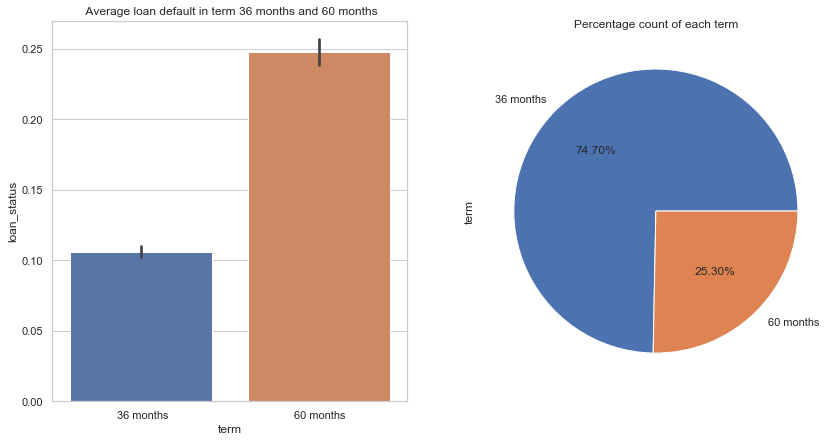

In [271]:
#  term and loan_status analysis
fig,axs = plt.subplots(1,2,figsize=(14,7))
sns.barplot(x= 'term' ,y='loan_status',data=loandf2,ax=axs[0])
axs[0].set_title(" Average loan default in term 36 months and 60 months")
loandf2.term.value_counts().plot(x=None,y=None,kind='pie',ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage count of each term")

#If you consider  both (default and non default) records for both the terms(36 & 60) , as per above graphs ( both Bar and Pie). we can conclude Term - 60 months are more defaulter that term-36.

Loans with 5 years term contribute more defaults as compared to 3 years. Only 25% loans are in this category and we should try to attract those customers towards 3 years or have another term as 4 years defined.

Text(0.5, 1.0, 'Percentage count of each grade')

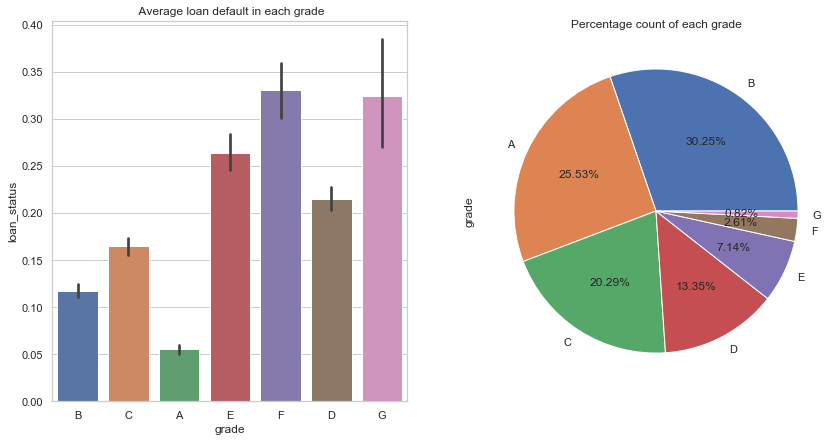

In [272]:
#  grade and loan_status analysis
fig,axs = plt.subplots(1,2,figsize=(14,7))
sns.barplot(x= 'grade' ,y='loan_status',data=loandf2,ax=axs[0])
axs[0].set_title(" Average loan default in each grade")
loandf2.grade.value_counts().plot(x=None,y=None,kind='pie',ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage count of each grade")

As per the graph charts above , pie chart explains you each grade how much % of applicants falling and below 10% of the applicants are more defaulters (grade E,F,G) ,We should have more scrutiny during loan process to these kind of loans

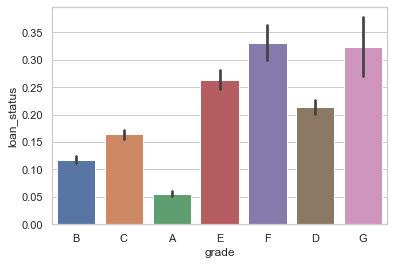

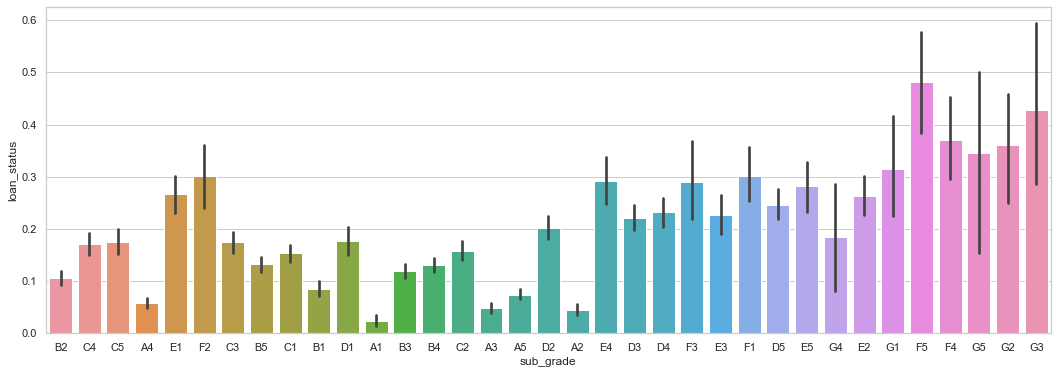

In [273]:
# bar grapg between grade and sub grade  and loan_status
bar_chart('grade')
plt.figure(figsize=(18, 6))
bar_chart('sub_grade')

As per above charts between Grade and sub grade level .. In Graden F, subgrade F5 is more defalters after that F4 an  In Grade G ,subgrade G3 has more defaulters and we have to takecare while considering loan aproval especially F5 and G3 sub grades. 

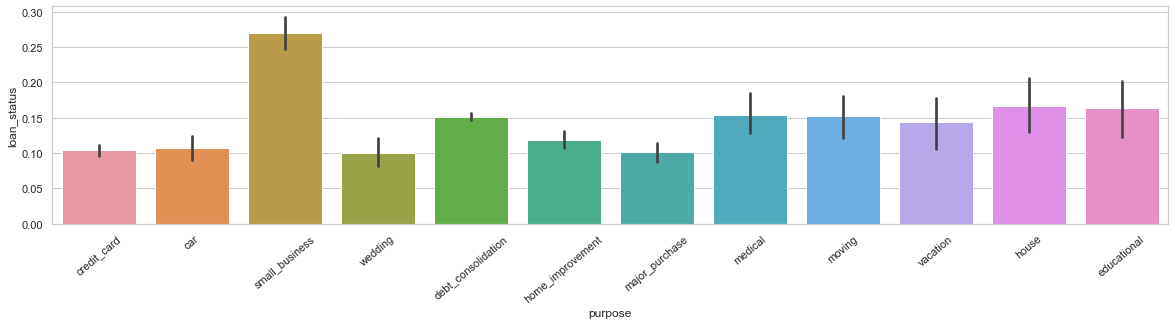

In [274]:
# bar grapg between purpose and loan_status
plt.figure(figsize=(20, 4))
plt.xticks(rotation=40)
bar_chart('purpose')

As per above graph "small_business" applicants are more defaulters.

In [275]:
# There are some records populated with NONE as home_ownership. It's not helping in analysis, let's delete them
loandf2=loandf2[loandf2.home_ownership!="NONE"]

Text(0.5, 1.0, 'Average loan default in each verification_status')

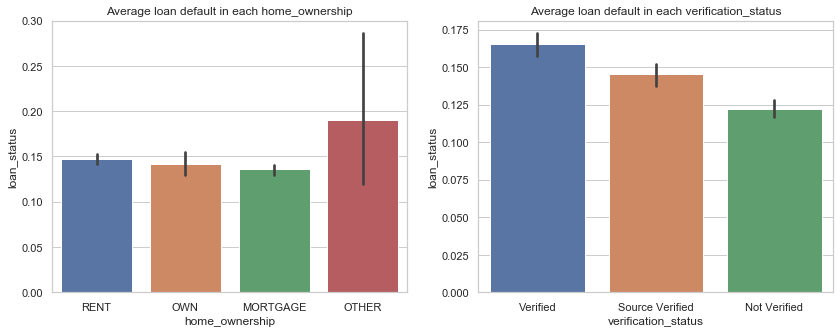

In [276]:
fig,axs = plt.subplots(1,2,figsize=(14,5))
# bar grapg between home_ownership and loan_status
sns.barplot(x= 'home_ownership' ,y='loan_status',data=loandf2,ax=axs[0])
axs[0].set_title("Average loan default in each home_ownership")
sns.barplot(x= 'verification_status' ,y='loan_status',data=loandf2,ax=axs[1])
axs[1].set_title("Average loan default in each verification_status")


As per above graphs home_ownership Others are more defaulters and as per Varification status slightly more defaulters in are verified applicants than secure verified and not verified.

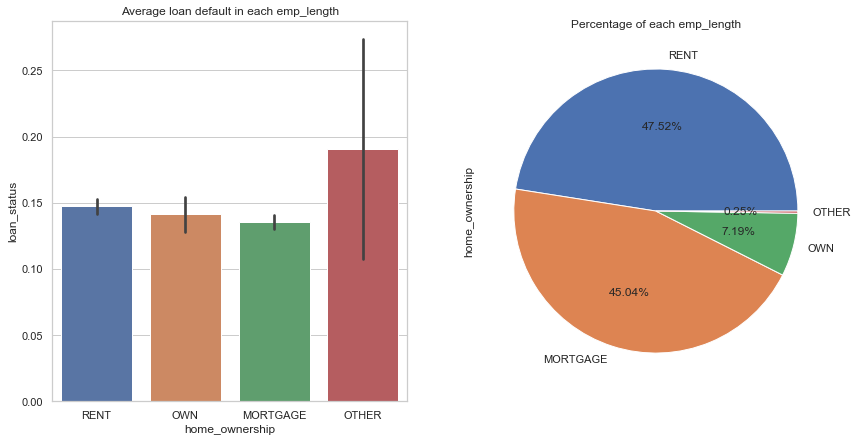

In [277]:
#home_ownership analysis
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.barplot(x='home_ownership',y='loan_status',data=loandf2,ax=axs[0])
axs[0].set_title("Average loan default in each emp_length")
loandf2.home_ownership.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each emp_length")
plt.show()

It's intresting to see that group of people who has not declared their exact home_ownership status, are the one who defaulted more on loans. It should be restricted to not approve loan for this category as it also constitutes just a fraction of percent of total loans.

In [278]:
#bucketeting the loan amount fields. Bucket size decided based on distribution plot on columns.
import math
def loan_buk_amount(amt):
    return (math.ceil(amt/5000))*5000

In [279]:
print(loan_buk_amount(10000))

10000


In [280]:
# creating bins like <=5000 ,<=10000 ,<=15000 and so on ...
loandf2['loan_amnt_bkt'] = loandf2['loan_amnt'].apply(lambda x: loan_buk_amount(x))
loandf2['funded_amnt_inv_bkt'] = loandf2['funded_amnt_inv'].apply(lambda x: loan_buk_amount(x))

In [281]:
loandf2[['loan_amnt','loan_amnt_bkt']]

,loan_amnt,loan_amnt_bkt
0,5000,5000
1,2500,5000
2,2400,5000
5,5000,5000
6,7000,10000
7,3000,5000
8,5600,10000
10,6500,10000
11,12000,15000
12,9000,10000


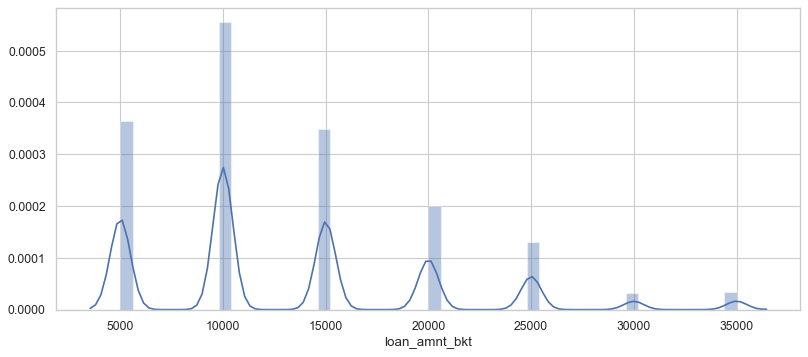

In [282]:
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
sns.distplot(loandf2['loan_amnt_bkt'])
plt.show()

As per above graph bins <=5000,<=10000,<=15000,<=20000 .... histogram with bin size (< 5000 and <= 15000) more hight most the of the applicants applied for the lona in that range only

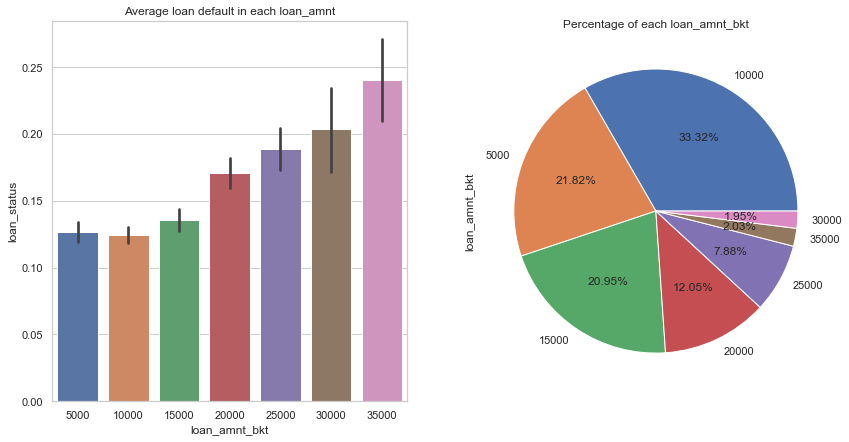

In [283]:
#Loan amount bucket analysis
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.barplot(x='loan_amnt_bkt',y='loan_status',data=loandf2,ax=axs[0])
axs[0].set_title("Average loan default in each loan_amnt")
loandf2.loan_amnt_bkt.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each loan_amnt_bkt")
plt.show()


Again loans in the range 30-35K constitute very less percentage of total loans apporoved but possibility of getting defaulted is highest.

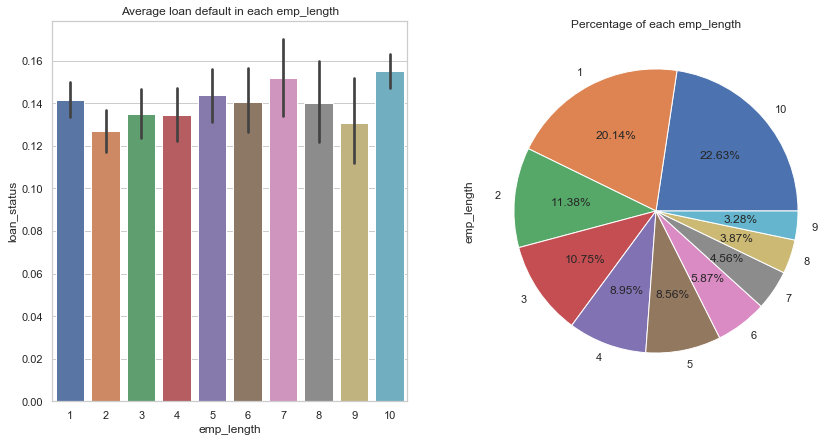

In [284]:
#Loan amount based on employement length analysis
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.barplot(x='emp_length',y='loan_status',data=loandf2,ax=axs[0])
axs[0].set_title("Average loan default in each emp_length")
loandf2.emp_length.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each emp_length")
plt.show()


There seems to be not much difference based on employment length. However it's intresting to note that there are huge increase in loan applications after 10 years. It may be because of kids education support etc

In [285]:
#Loan Amount to anula income ratio
loandf2['loan_incom_ratio'] = loandf2['loan_amnt']/loandf2['annual_inc']

In [286]:
#Distribution of loans accross years
loandf2['issue_d'].head()

0    11-Dec
1    11-Dec
2    11-Dec
5    11-Dec
6    11-Dec
Name: issue_d, dtype: object

In [287]:
#Extract Year & Month from Issue date
loandf2['issue_month'],loandf2['issue_year'] = loandf2['issue_d'].str.split('-', 1).str
loandf2[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,11-Dec,11,Dec
1,11-Dec,11,Dec
2,11-Dec,11,Dec
5,11-Dec,11,Dec
6,11-Dec,11,Dec


In [288]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loandf2['issue_month'] = pd.Categorical(loandf2['issue_month'],categories=months_order, ordered=True)

In [289]:
loandf2['loan_amnt'].describe()

count   33736
mean    11468
std      7375
min       500
25%      6000
50%     10000
75%     15000
max     35000
Name: loan_amnt, dtype: float64

loan amount min value is 500 and max value is 35000 as per the loan dataset after clean.

In [290]:
# Create Bins for range of loan_amnt
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loandf2['loan_amnt_range'] = pd.cut(loandf2['loan_amnt'], bins, labels=slot)

In [291]:
loandf2['annual_inc'].describe()


count     33736
mean      70006
std       65897
min        4000
25%       42000
50%       60000
75%       84000
max     6000000
Name: annual_inc, dtype: float64

annual income Min is 400000 and max is 600000

In [292]:
#Create bins for range of  annual_inc between 0 to 10 lakhs
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loandf2['annual_inc_range'] = pd.cut(loandf2['annual_inc'], bins, labels=slot)

In [293]:
loandf2['int_rate'].describe()

count   33736
mean       12
std         4
min         5
25%         9
50%        12
75%        14
max        24
Name: int_rate, dtype: float64

Min intrest is 5.42 and max intrest rate is 24.11

In [294]:
#Create Bins for range of Interest rates
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loandf2['int_rate_range'] = pd.cut(loandf2['int_rate'], bins, labels=slot)

#Create generic function plot_graphs() for both Continuaous and categorical variables:
1. To generate continuous variables to understand the central tendency and spread of the variables using  different visualization methods ( Boxplot,Histograms and Violin Plots to  measure various statistical metrics.
2. For categorical variables,To understand distribution of each category can be measured using 2 metircs,count and count% against each category using countplot or Bat chart can be used as visualization

In [295]:
def plot_graphs(p_df,p_col,p_vartype,p_cat=None):
    
    '''
    plot_graphs function will plot the graphs based on the parameters.
    p_df    : dataframe name
    p_col     : Column name
    p_vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    p_cat     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="whitegrid")
    
    if p_vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(p_df[p_col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =p_df, x=p_col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =p_df, x=p_col,ax=ax[2],orient='v')
    
    if p_vartype == 1:
        temp = pd.Series(data = p_cat)
        fig, ax = plt.subplots()
        width = len(p_df[p_col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = p_df, x= p_col, order=p_df[p_col].value_counts().index,hue = p_cat) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loandf2))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

 For continuous Variables - Loan Amount

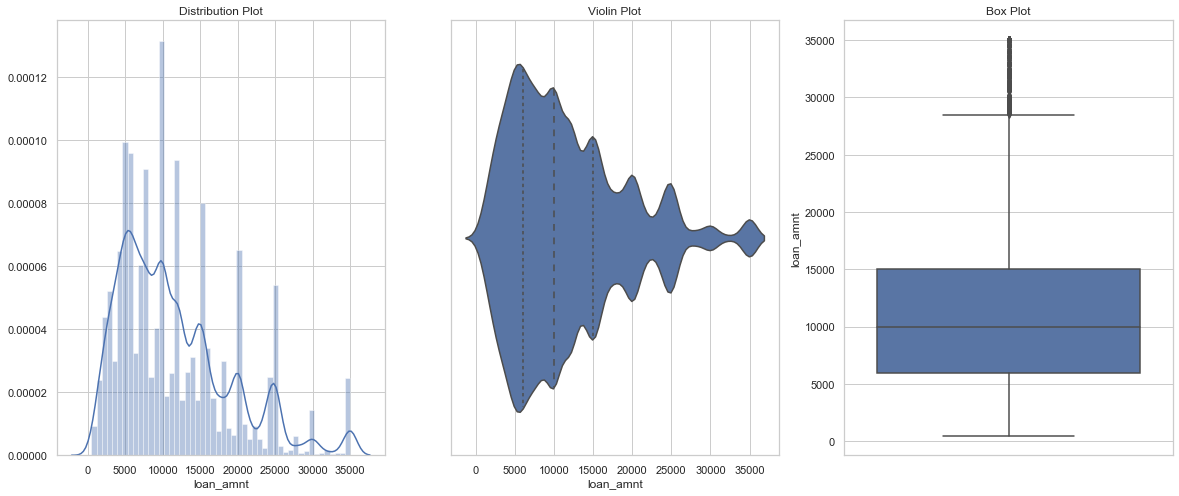

In [296]:
plot_graphs(p_df =loandf2,p_col ='loan_amnt',p_vartype =0)

Insights  of this plots represents loan amounts are distributed between 8k and 20k 

For continuous Variables - Interest Rate

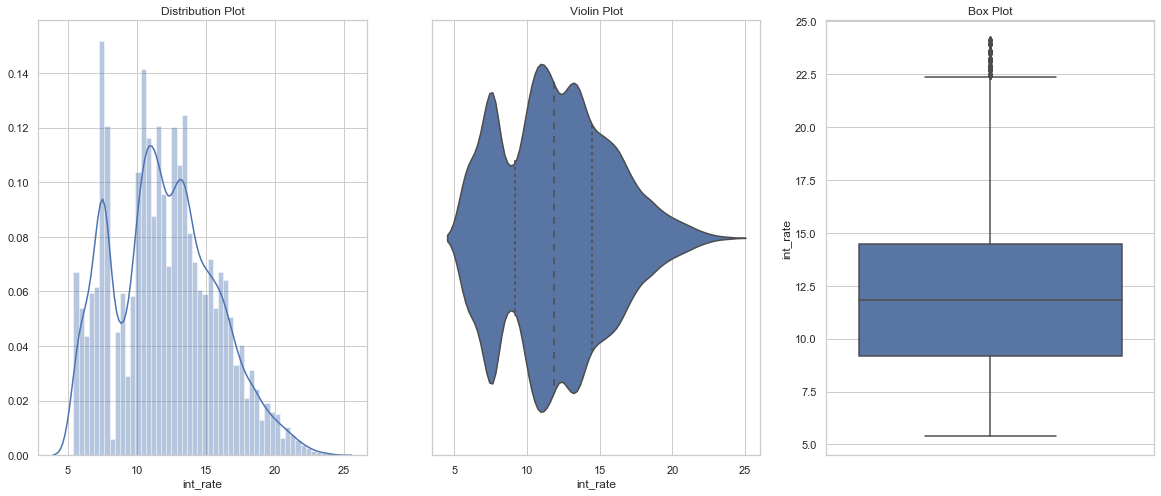

In [297]:
plot_graphs(p_df =loandf2,p_col ='int_rate',p_vartype =0)

Usefull insight from this plots are that interest rates are distributed between 10% to 16%


For continuous Variables - Annual Income

In [298]:
loandf2["annual_inc"].describe()

count     33736
mean      70006
std       65897
min        4000
25%       42000
50%       60000
75%       84000
max     6000000
Name: annual_inc, dtype: float64

In [299]:
pd.options.display.float_format = '{:.0f}'.format
loandf2["annual_inc"].describe(percentiles = [0.05, 0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count     33736
mean      70006
std       65897
min        4000
5%        25000
10%       30000
25%       42000
50%       60000
75%       84000
90%      118000
95%      143130
99%      235000
max     6000000
Name: annual_inc, dtype: float64

In [300]:
#Remove Outliers values from 99 to 100% 
q = loandf2["annual_inc"].quantile(0.995)
loandf2 = loandf2[loandf2["annual_inc"] < q]
loandf2["annual_inc"].describe()

count    33539
mean     67288
std      37222
min       4000
25%      42000
50%      60000
75%      83000
max     294000
Name: annual_inc, dtype: float64

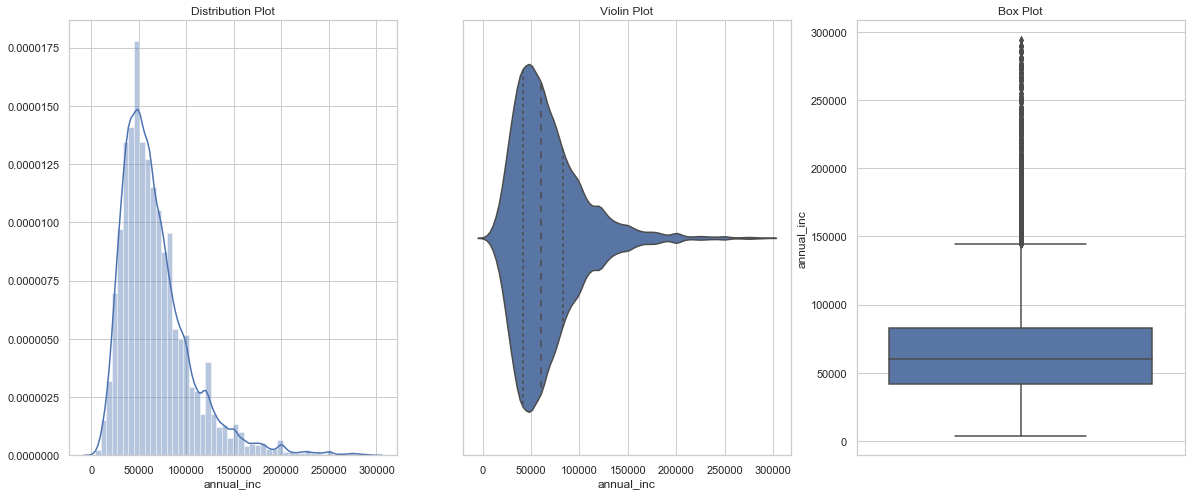

In [301]:
plot_graphs(p_df=loandf2,p_col='annual_inc',p_vartype=0)

Insights: most of the applicants earns between 40000 to 90000 usd annually

Categorical variables - Loan Status

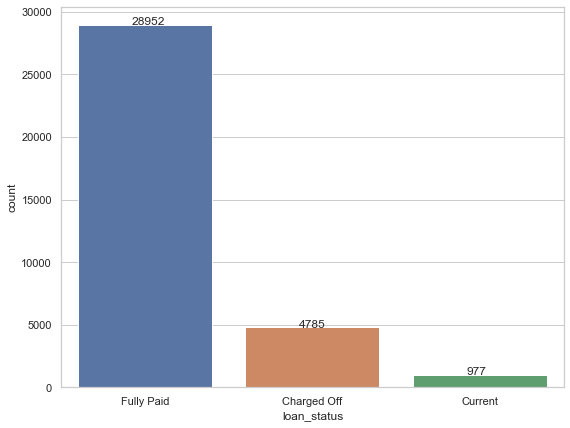

In [302]:
plot_graphs(p_df=loandf,p_col='loan_status',p_vartype=1)

In [303]:
#Insights:
stat_chargedoff =  loandf['loan_status']=='Charged Off'
ChargedOff = (loandf[stat_chargedoff].count()/loandf.count())*100
print(ChargedOff.loan_status)

13.784064066370917


Insight is 14% of the applicants Charged off.

Categorical variables - Purpose of loan

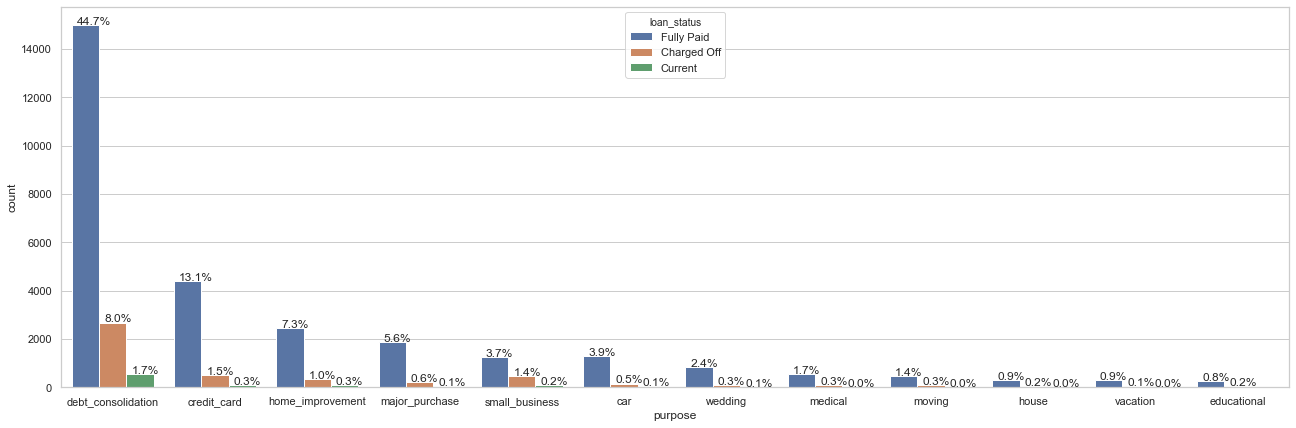

In [304]:
plot_graphs(p_df=loandf,p_col='purpose',p_vartype=1,p_cat='loan_status')

Insights: approx 52% of the applicants applied loan for paying other loans(Debt Consolidation)

In [305]:
# Remove rows where home_ownership'=='OTHER', 'NONE', 'ANY'
rem = ['OTHER', 'NONE', 'ANY']
loandf.drop(loandf[loandf['home_ownership'].isin(rem)].index,inplace=True)
loandf.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE'], dtype=object)

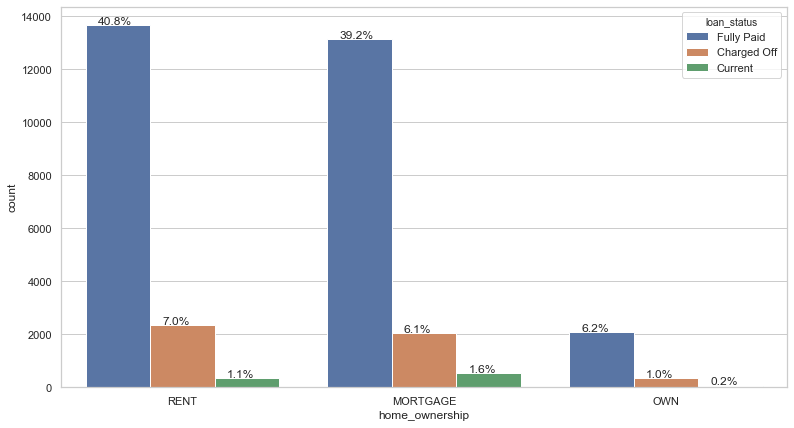

In [306]:
plot_graphs(p_df=loandf,p_col='home_ownership',p_vartype=1,p_cat='loan_status')

 Insight: 49.2% applicants are living  in rented homes whereas 47% applicants were mortagaged their home

Year wise Loan

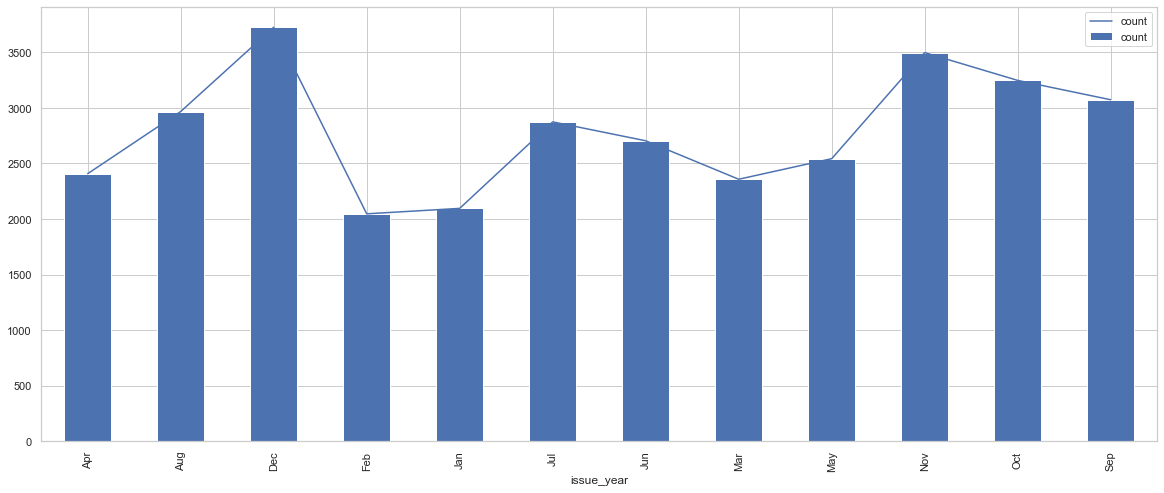

In [307]:
year_wise_loan =loandf2.groupby(by= [loandf2.issue_year])[['loan_status']].count()
year_wise_loan.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise_loan.plot(figsize=(20,8))
year_wise_loan.plot(kind='bar',figsize=(20,8),ax = ax)
plt.show()

Insights: Loan applicants are increasing year on year

Catagorical -loan Term

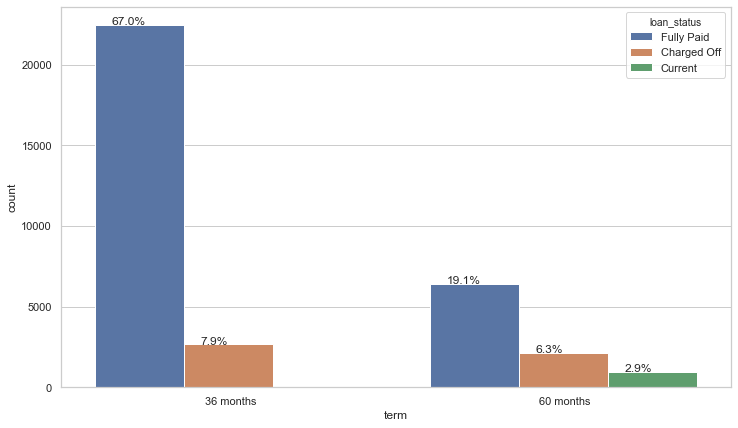

In [308]:
plot_graphs(p_df=loandf,p_col='term',p_vartype=1,p_cat='loan_status')

Insights: 75.3% of applications applied loan for 36 months term period

Bivariate Analysis : To find out the relation ship between 2 or more variables.

#1. purpose of Loan vs Loan Amount for each Loan Status

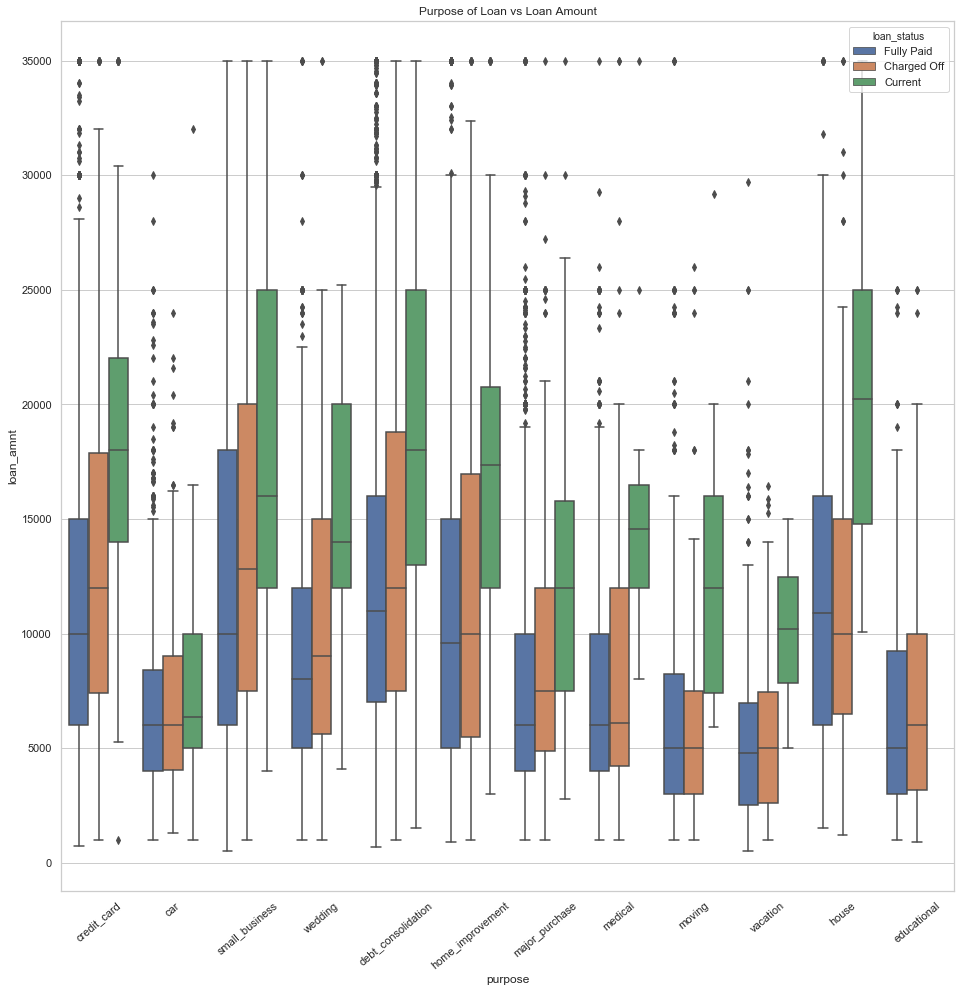

In [309]:
plt.figure(figsize=(16,16))
sns.boxplot(data =loandf, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=40)
plt.show()

#Correlation Matrix: all Numeric variables

In [310]:
# Create correlation matrices between all numeric variables like loan_amnt,funded_amnt,
loan_correlation = loandf2.corr()
loan_correlation

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,inq_last_6mths,pub_rec_bankruptcies,loan_amnt_bkt,funded_amnt_inv_bkt,loan_incom_ratio
loan_amnt,1,1,1,0,1,0,0,0,0,0,-0,1,1,1
funded_amnt,1,1,1,0,1,0,0,0,0,0,-0,1,1,1
funded_amnt_inv,1,1,1,0,1,0,0,0,0,-0,-0,1,1,1
int_rate,0,0,0,1,0,0,0,0,0,0,0,0,0,0
installment,1,1,1,0,1,0,0,0,0,0,-0,1,1,1
emp_length,0,0,0,0,0,1,0,0,0,0,0,0,0,0
annual_inc,0,0,0,0,0,0,1,-0,-0,0,-0,0,0,-0
loan_status,0,0,0,0,0,0,-0,1,0,0,0,0,0,0
dti,0,0,0,0,0,0,-0,0,1,-0,0,0,0,0
inq_last_6mths,0,0,-0,0,0,0,0,0,-0,1,0,0,-0,-0


HeatMap: All continuos variables

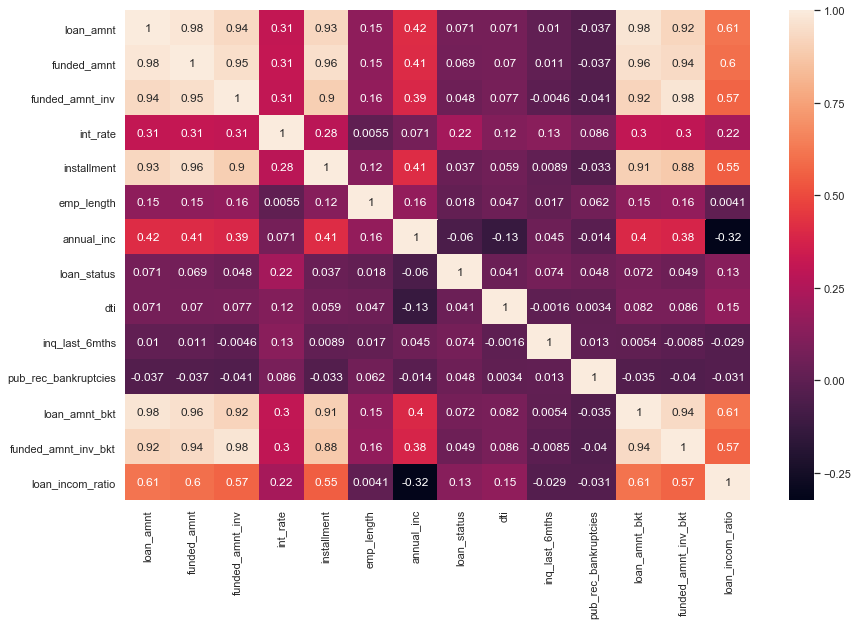

In [311]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

Insights: From the above Heatmap , we can see 'loan_amnt','funded_amnt','funded_amnt_inv' are closely interrelated. 